<a href="https://colab.research.google.com/github/RudkovYaroslav/spotify_project/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В нашем распоряжении выгрузка с нескольких стриминговых сервисов популярных треков. Необходимо провести предобработку данных и исследовательский анализ, в ходе которого предстоит выяснить самых популярных исполнителей, тенденцию по количествам стримов по годам, и т.д.

План анализа:
- 1 Изначально рассмотрю DataFrame на пригодность для анализа
- 2 Проведу предобработку с целью упрощения дальнейшего анализа, а так же устранения пропусков или, возможных, аномальных значений.
- 3 Проведу исследовательский анализ данных для оценки важнейших показателей:
  - 3.1 Исполнители с наибольшим количеством треков
  - 3.2 Самые прослушиваемые исполнители
  - 3.3 Являются ли самые активные исполнители наиболее прослушиваемыми?
  - 3.4 Есть ли зависимость определенных качеств треков к количеству стримов?
  - 3.5 Какая тендеция использования стриминговых сервисов по годам?
  - 3.6 Какая стриминговая платформа является самой популярной у пользователей?
- 4 Составлю вывод о результатах исследования

## 1. Импорт библиотек и извлечение DataFrame

In [ ]:
import pandas as pd #Библиотека для обработки DataFrame
import seaborn as sns #Библиотека для постройки графиков
import datetime as dt #Библиотека для работы с датами
import matplotlib.pyplot as plt #Библиотека для задачи аттрибутов графиков
plt.rcParams["figure.figsize"] = (15,5)
import numpy as np #Библиотека для использования математических функций
import warnings #Библиотека для того, чтобы убрать сообщения об "ошибках"
warnings.filterwarnings('ignore')

Сам DataFrame получим из csv файла, найденного на беслпатном ресурсе kaggle (https://www.kaggle.com/datasets/zeesolver/spotfy?resource=download)

Внутри используется не utf-8, так что внесем изменения

In [ ]:
df = pd.read_csv('C:/Users/User/Documents/DataSets_For_Jupyter/Popular_Spotify_Songs.csv', encoding='latin1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


## 2 Предобработка DataFrame

Взглянем на то, что имеем

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Сразу переименуем столбцы для удобства

In [ ]:
df.rename(columns=lambda x: x.replace('_%', ''), inplace=True)

### 2.1 Обработка пропусков

Видим, что некоторые столбцы имеют неправильный тип данных, а также, что есть определенное количество пропусков. Взглянем поподробнее на них.

In [ ]:
pd.DataFrame(round(df.isna().mean()*100)).sort_values(by=0, ascending=False).style.background_gradient('coolwarm')

,0
key,10.000000
in_shazam_charts,5.000000
track_name,0.000000
artist(s)_name,0.000000
liveness,0.000000
instrumentalness,0.000000
acousticness,0.000000
energy,0.000000
valence,0.000000
danceability,0.000000


Цифры в данной таблице представляют проценты от общего количества. Попробуем от них избавиться

Сначала проверим, зависят ли они друг от друга:

In [ ]:
df[(df['in_shazam_charts'].isna()) & (df['key'].isna())]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
127,Watermelon Sugar,Harry Styles,1,2019,11,17,21915,34,2322580122,437,...,95,NaN,Major,55,56,82,12,0,34,5
395,Space Song,Beach House,1,2015,1,1,17852,4,789753877,69,...,147,NaN,Minor,51,62,79,22,13,14,3
504,Out of Time,The Weeknd,1,2022,1,7,3711,0,339659802,49,...,93,NaN,Minor,65,82,74,27,0,32,5
506,We Don't Talk About Bruno,"Adassa, Mauro Castillo, Stephanie Beatriz, Enc...",7,2021,11,19,2785,0,432719968,95,...,206,NaN,Minor,58,83,45,36,0,11,8
531,Happier Than Ever,Billie Eilish,1,2021,7,30,8476,0,1056760045,138,...,65,NaN,Major,31,31,24,76,0,14,4
532,Moth To A Flame (with The Weeknd),"The Weeknd, Swedish House Mafia",2,2021,10,22,7495,17,611994237,114,...,120,NaN,Minor,56,16,67,0,0,11,4
554,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon",3,2021,3,19,14140,0,1445941661,231,...,90,NaN,Major,63,49,68,38,0,42,18
560,Life Goes On,Oliver Tree,1,2020,7,17,2868,0,501541661,43,...,80,NaN,Major,70,57,49,19,0,12,8
727,Somebody That I Used To Know,"Gotye, Kimbra",2,2011,1,1,42798,0,1457139296,217,...,129,NaN,Major,86,75,52,54,0,10,4


Всего 9 совпадений из возможных 50. Зависимости почти нет. Проверим столбец in_shazam_charts по уникальным значениям:

In [ ]:
df['in_shazam_charts'].unique()

array(['826', '382', '949', '548', '425', '946', '418', '194', '953',
       '339', '251', '168', '1,021', '1,281', nan, '187', '0', '1,173',
       '29', '150', '73', '139', '1,093', '96', '211', '325', '294',
       '197', '27', '310', '354', '184', '212', '81', '82', '100', '62',
       '69', '727', '311', '1,133', '102', '332', '259', '140', '16',
       '110', '810', '176', '615', '210', '216', '215', '167', '37',
       '171', '272', '529', '26', '5', '169', '230', '84', '154', '93',
       '115', '72', '8', '323', '49', '1,451', '1,170', '429', '162',
       '10', '478', '236', '200', '78', '266', '486', '204', '34', '202',
       '312', '32', '153', '519', '458', '48', '666', '14', '925', '88',
       '203', '44', '74', '638', '64', '71', '2', '3', '136', '148', '22',
       '368', '1', '189', '52', '9', '31', '66', '208', '28', '558',
       '195', '13', '60', '503', '56', '15', '454', '40', '285', '129',
       '58', '117', '47', '20', '30', '80', '263', '116', '57', '39',
  

Параллельно видим, что значения больше 1000 записаны через запятую. Исправим это

In [ ]:
df['in_shazam_charts'] = df['in_shazam_charts'].replace('1,', '1', regex=True)

Забегая вперед, такая же проблема будет и в in_deezer_playlists, так что исправим ее здесь

In [ ]:
df['in_deezer_playlists'] = df['in_deezer_playlists'].replace(',', '', regex=True)

In [ ]:
df['in_shazam_charts'].unique()

array(['826', '382', '949', '548', '425', '946', '418', '194', '953',
       '339', '251', '168', '1021', '1281', nan, '187', '0', '1173', '29',
       '150', '73', '139', '1093', '96', '211', '325', '294', '197', '27',
       '310', '354', '184', '212', '81', '82', '100', '62', '69', '727',
       '311', '1133', '102', '332', '259', '140', '16', '110', '810',
       '176', '615', '210', '216', '215', '167', '37', '171', '272',
       '529', '26', '5', '169', '230', '84', '154', '93', '115', '72',
       '8', '323', '49', '1451', '1170', '429', '162', '10', '478', '236',
       '200', '78', '266', '486', '204', '34', '202', '312', '32', '153',
       '519', '458', '48', '666', '14', '925', '88', '203', '44', '74',
       '638', '64', '71', '2', '3', '136', '148', '22', '368', '1', '189',
       '52', '9', '31', '66', '208', '28', '558', '195', '13', '60',
       '503', '56', '15', '454', '40', '285', '129', '58', '117', '47',
       '20', '30', '80', '263', '116', '57', '39', '111', '7

Если мы будем делать дальнейшие вычисления, то целесообразно оставить пропуски, так как их не так много. Но также изменим тип данных для возможности проведения вычислений.

In [ ]:
df['in_shazam_charts'] = df['in_shazam_charts'].astype('float64')

In [ ]:
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype('int64')

In [ ]:
df['in_shazam_charts'].sum()

54176.0

Теперь посмотрим второй столбец с пропусками:

In [ ]:
df['key'].unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', nan, 'G#', 'G', 'E', 'A#', 'D#'],
      dtype=object)

Здесь самым логичным решением будет замена на значение - заглушку

In [ ]:
df['key'] = df['key'].fillna('unknown')

### 2.2 Приведение к правильным типам данных

Для анализа нам может пригодиться полная дата в формате даты. Сделаем отдельную колонку

In [ ]:
df[['released_year', 'released_month', 'released_day']] = df[['released_year', 'released_month', 'released_day']].astype(str)

In [ ]:
df['full_release_date'] = pd.to_datetime(df['released_year'] + '-' + df['released_month'] + '-' + df['released_day'])

In [ ]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,full_release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,2023-05-18


### 2.3 Создание сводной таблицы с информацией о треке и обработка каждого ее столбца

В основном DataFrame содержится много информации, но для сегодняшнего анализа интересует нас только все, что связано с самим треком. Создадим отдельный DataFrame

In [ ]:
song_info = df[['track_name', 'artist(s)_name', 'artist_count', 'streams', 'bpm', 'key', 'mode','danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness','speechiness']]

In [ ]:
song_info.head()

,track_name,artist(s)_name,artist_count,streams,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,141381703,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,133716286,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,140003974,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,800840817,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,303236322,144,A,Minor,65,23,80,14,63,11,6


Теперь пройдемся по каждому столбцу в отдельности и проверим его

- 1 Видим, что названия треков в первом столбце построены по-разному. Приведем их к одноум регистру

In [ ]:
song_info['track_name'] = song_info['track_name'].str.capitalize()

- 2 Проверим, совпадает ли во всех случаях количество исполнителей с указанными.

In [ ]:
song_info[(song_info['artist(s)_name'].str.count(',') + 1) != song_info['artist_count']]

,track_name,artist(s)_name,artist_count,streams,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
667,"Cayï¿½ï¿½ la noche (feat. cruz cafunï¿½ï¿½, ab...","Quevedo, La Pantera, Juseph, Cruz Cafunï¿½ï¿½,...",7,245400167,174,F,Minor,67,74,75,44,0,7,30


Есть один пограничный случай, который вылез из-за непропечатавшихся арабских символов. Оставим его

- 3 Проверим столбец streams

In [ ]:
song_info['streams'].min(), song_info['streams'].max()

('100409613',
 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3')

Видим странное максимальное значение. Проверим, не пустая ли строка из-за этого:

In [ ]:
song_info[song_info['streams'] == song_info['streams'].max()]

,track_name,artist(s)_name,artist_count,streams,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
574,Love grows (where my rosemary goes),Edison Lighthouse,1,BPM110KeyAModeMajorDanceability53Valence75Ener...,110,A,Major,53,75,69,7,0,17,3


Видим, что только значение streams испортилось. Посмотрим, что с этим можно сделать. Проверим, насколько много треков у исполнителя:

In [ ]:
song_info[song_info['artist(s)_name'] == 'Edison Lighthouse']

,track_name,artist(s)_name,artist_count,streams,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
574,Love grows (where my rosemary goes),Edison Lighthouse,1,BPM110KeyAModeMajorDanceability53Valence75Ener...,110,A,Major,53,75,69,7,0,17,3


К сожалению, мы не можем заменить на медиану, так как не знаем, насколько исполнитель популярен. Вынуждены оставить 0

In [ ]:
song_info.loc[song_info['streams'] == song_info['streams'].max(), 'streams'] = 0

И переведем в формат цифр для дальнейших вычислений

In [ ]:
song_info['streams'] = song_info['streams'].astype('int64')

In [ ]:
song_info['streams'].min(), song_info['streams'].max()

(0, 3703895074)

Теперь все как надо.

- 4 Теперь посмотрим, есть ли что-то, отличное от двух категорий в столбце mode:

In [ ]:
song_info['mode'].unique()

array(['Major', 'Minor'], dtype=object)

- 5 Дальше быстро пройдемся по оставшимся столбцам. Вычтем из максимального значения минимальное. Если ответ в пределах 100, значит аномалий нет

In [ ]:
song_info.iloc[:,7:].agg(lambda x: x.max() - x.min())

danceability        73
valence             93
energy              88
acousticness        97
instrumentalness    91
liveness            94
speechiness         62
dtype: int64

Все в пределах сотни

In [ ]:
song_info.head()

,track_name,artist(s)_name,artist_count,streams,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,Seven (feat. latto) (explicit ver.),"Latto, Jung Kook",2,141381703,125,B,Major,80,89,83,31,0,8,4
1,Lala,Myke Towers,1,133716286,92,C#,Major,71,61,74,7,0,10,4
2,Vampire,Olivia Rodrigo,1,140003974,138,F,Major,51,32,53,17,0,31,6
3,Cruel summer,Taylor Swift,1,800840817,170,A,Major,55,58,72,11,0,11,15
4,Where she goes,Bad Bunny,1,303236322,144,A,Minor,65,23,80,14,63,11,6


## 3 Исследовательский анализ

### 3.1 Исследуем общее количество стримов по трекам

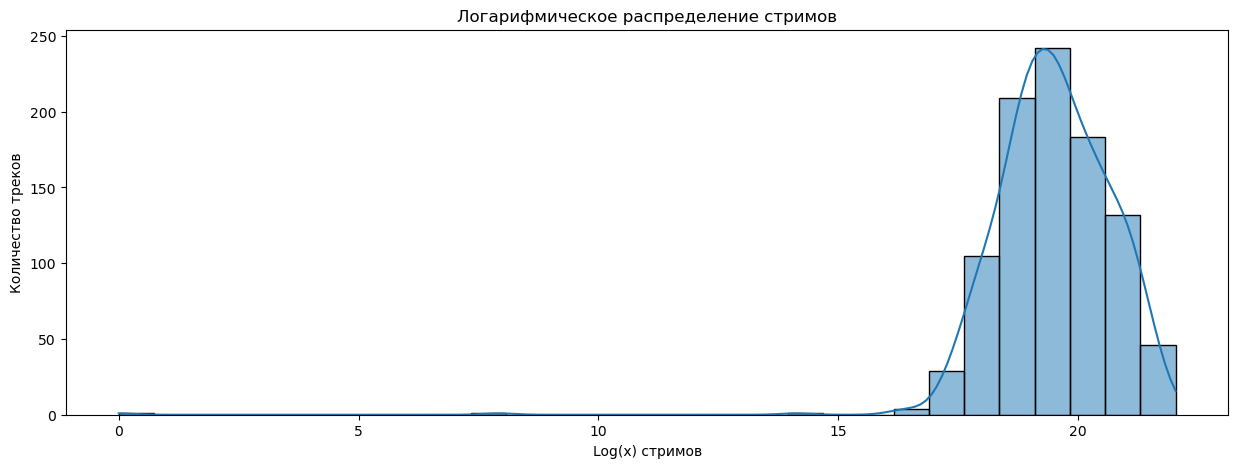

In [ ]:
sns.histplot(song_info['streams'].apply(lambda x: np.log(x+1)), bins=30, kde=True)
plt.title('Логарифмическое распределение стримов')
plt.ylabel('Количество треков')
plt.xlabel('Log(x) стримов')
plt.show()

Для построения графика взяли логарифм от количество стримов для того, чтобы лучше понять, как выглядит распределение. У нас достаточно большая разница есть в значениях и взять квадратный корень не представляется возможным. По графику видим, что подавляющее большинство треков имеют Log(x)стримов в районе 15-20/23.

### 3.2 Найдем исполнителей с наибольшим количеством выпущенных треков

В данных есть не только сольные композиции, но и групповые. Так что рассмотрим, используя это знание:

In [ ]:
song_info['splitted'] = song_info['artist(s)_name'].apply(lambda x: x.split(r', ')) #Создаем столбец, в котором имена исполнителей четко разделены

In [ ]:
song_info.head()

,track_name,artist(s)_name,artist_count,streams,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,splitted
0,Seven (feat. latto) (explicit ver.),"Latto, Jung Kook",2,141381703,125,B,Major,80,89,83,31,0,8,4,"[Latto, Jung Kook]"
1,Lala,Myke Towers,1,133716286,92,C#,Major,71,61,74,7,0,10,4,[Myke Towers]
2,Vampire,Olivia Rodrigo,1,140003974,138,F,Major,51,32,53,17,0,31,6,[Olivia Rodrigo]
3,Cruel summer,Taylor Swift,1,800840817,170,A,Major,55,58,72,11,0,11,15,[Taylor Swift]
4,Where she goes,Bad Bunny,1,303236322,144,A,Minor,65,23,80,14,63,11,6,[Bad Bunny]


In [ ]:
names= {} #Создаем пустой словарь, который будет служить счетчиком

In [ ]:
def uniqueness(row): #Данная функция проверяет, есть ли исполнитель в словаре. Если он есть, то увеличивает счетчик, если нет, то создает новый.
    for i in row:
        if i in names:
            names[i] +=1
        else:
            names[i] = 1
    return

In [ ]:
song_info['splitted'].apply(uniqueness) #Используем созданную функцию в действии

0      None
1      None
2      None
3      None
4      None
       ... 
948    None
949    None
950    None
951    None
952    None
Name: splitted, Length: 953, dtype: object

In [ ]:
authors = pd.DataFrame(data=list(names.items()), columns=['author', 'count']).sort_values(by='count', ascending=False)
authors #Создаем DataFrame из получившегося словаря и проверяем его

,author,count
5,Bad Bunny,40
4,Taylor Swift,38
28,The Weeknd,37
18,SZA,23
116,Kendrick Lamar,23
...,...,...
339,Shilpa Rao,1
338,Conan Gray,1
337,La Joaqui,1
336,Steve Aoki,1


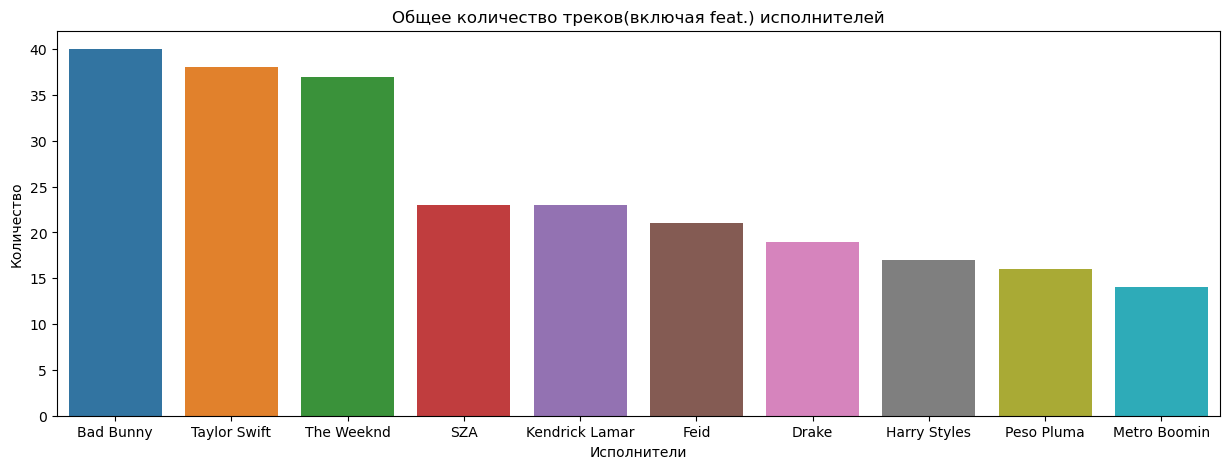

In [ ]:
sns.barplot(x=authors.head(10)['author'].values, y=authors.head(10)['count'].values)
plt.title('Общее количество треков(включая feat.) исполнителей')
plt.xlabel('Исполнители')
plt.ylabel('Количество')
plt.show()

Получили график, в котором отобразили топ-10 исполнителей по количеству работ, в которых они учавствовали. Для сравнения построим такой же, но с количеством сольных треков.

In [ ]:
top_10 = song_info['artist(s)_name'].value_counts().head(10)

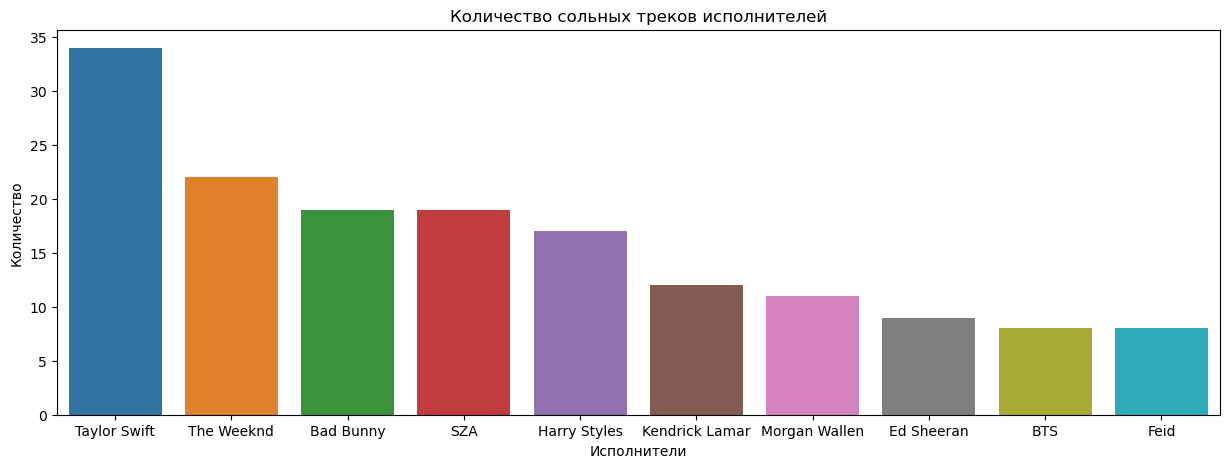

In [ ]:
sns.barplot(y=top_10.values, x=top_10.index)
plt.title('Количество сольных треков исполнителей')
plt.xlabel('Исполнители')
plt.ylabel('Количество')
plt.show()

Как мы видим, все не так однозначно. Тэйлор Свифт является безоговорочным лидером по количеству сольных работ, но вот Bad Bunny засветились в большем количестве треков в общем. Также можно увидеть, что некоторые исполнители, например, Дрейк, не выпускают сольные треки, а только учавствуют в колоборациях.

### 3.3 Найдем самых популярных исполнителей

Как критерий популярности будем использовать общее количество стримов

In [ ]:
top_10_streams = song_info.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)

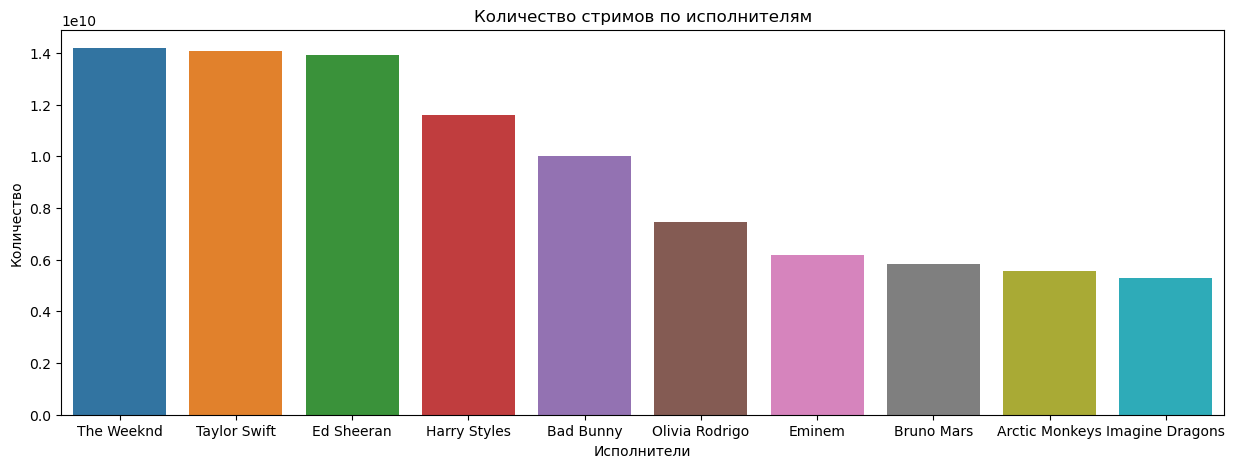

In [ ]:
sns.barplot(x=top_10_streams.index, y=top_10_streams.values)
plt.title('Количество стримов по исполнителям')
plt.xlabel('Исполнители')
plt.ylabel('Количество')
plt.show()

Нашли самых популярных исполнителей, но это еще не все. Сравним теперь значения из прошлого пункта, чтобы найти одновременно самых популярных и самых производительных исполнителей:

In [ ]:
top_10_streams[top_10_streams.index.isin(top_10.index)].index

Index(['The Weeknd', 'Taylor Swift', 'Ed Sheeran', 'Harry Styles',
       'Bad Bunny'],
      dtype='object', name='artist(s)_name')

Это буквально самые популярные исполнители. У них больше всего треков и больше всего стримов.

### 3.4 Посмотрим на корреляции между различными аспектами музыки и популярностью трека

В таблице приведены различные параметры, такие как "Насколько под трек можно танцевать", или "Насколько он энергичен". Попробуем найти хоть какие-нибудь зависимости этих показателей и популярности.

In [ ]:
song_info[['streams', 'bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']].corr()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
streams,1.000000,-0.002011,-0.104451,-0.041749,-0.026311,-0.003746,-0.044703,-0.048232,-0.111568
bpm,-0.002011,1.000000,-0.147095,0.041195,0.025794,-0.017694,-0.001195,-0.000761,0.039260
danceability,-0.104451,-0.147095,1.000000,0.408451,0.198095,-0.236165,-0.089138,-0.077538,0.184977
valence,-0.041749,0.041195,0.408451,1.000000,0.357612,-0.081907,-0.132890,0.021278,0.041081
energy,-0.026311,0.025794,0.198095,0.357612,1.000000,-0.577344,-0.038547,0.117302,-0.004846
acousticness,-0.003746,-0.017694,-0.236165,-0.081907,-0.577344,1.000000,0.042796,-0.050142,-0.022501
instrumentalness,-0.044703,-0.001195,-0.089138,-0.132890,-0.038547,0.042796,1.000000,-0.045967,-0.083396
liveness,-0.048232,-0.000761,-0.077538,0.021278,0.117302,-0.050142,-0.045967,1.000000,-0.022525
speechiness,-0.111568,0.039260,0.184977,0.041081,-0.004846,-0.022501,-0.083396,-0.022525,1.000000


На глаз не видно ни одного значения, сильно близкого к 1 или -1(Такие цифры бы показали сильную корреляцию между аспектами). Покажем более наглядно:

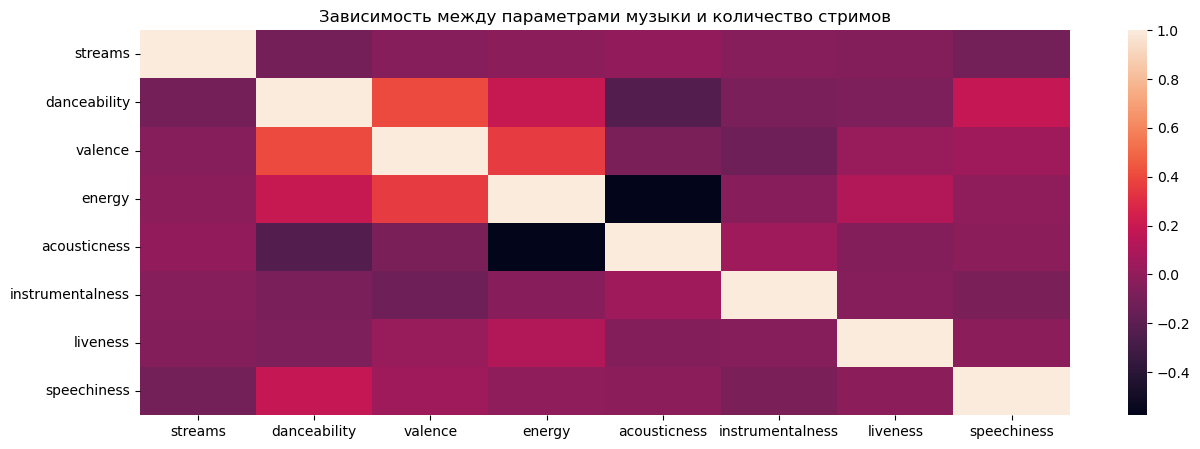

In [ ]:
sns.heatmap(song_info[['streams', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']].corr())
plt.title('Зависимость между параметрами музыки и количество стримов')
plt.show()

Везде почти отрицательная зависимость. Причем нет сильного влечения ни к 1, ни к -1. Получается, что нет определенного фактора успеха трека.

### 3.5 Оценим тенденцию пользования стриминговыми сервисами

Самый простой способ - поситать количество стримов по годам:

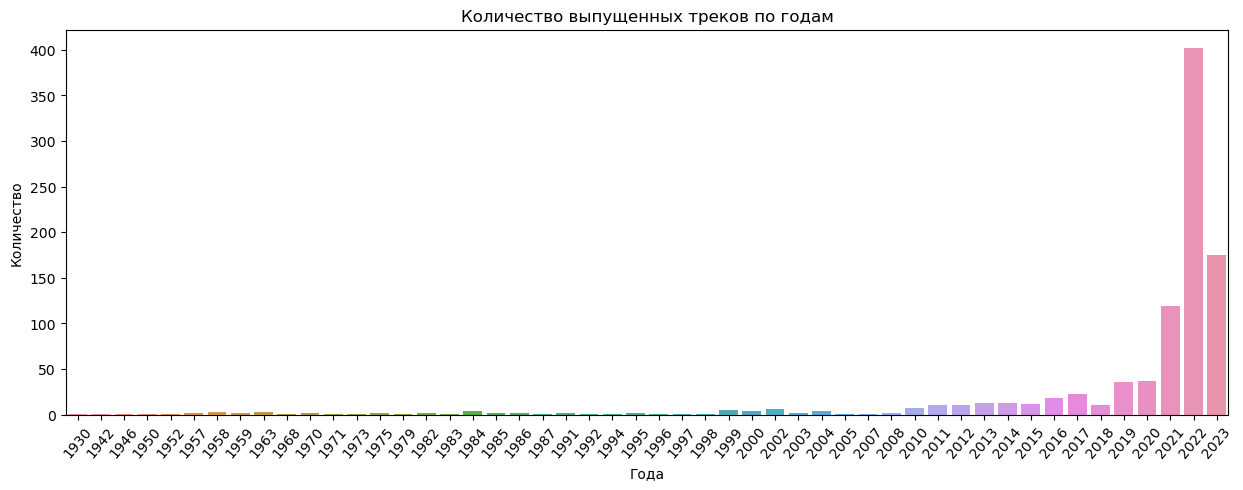

In [ ]:
sns.barplot(x=df.groupby('released_year').streams.count().index, y=df.groupby('released_year').streams.count().values)
plt.title('Количество выпущенных треков по годам')
plt.xlabel('Года')
plt.ylabel('Количество')
plt.xticks(rotation=50)
plt.show()

Видим, что тенденция сильно выросла после Ковида. Данные на 2023 год не полные. У нас максимальная дата - это 14 июля(Чуть больше полугода), так что мы не можем точно судить об этом периоде. В целом люди все больше и больше начинают пользоваться сервисами, и скорость роста в последнее время зашкаливает.

### 3.6 Сравнение популярности стриминговых сервисов

Здесь мы будем использовать немного неоднозначную метрику - количество треков в плейлистах и чартах. Это не даст нам в полной мере понять разницу в популярности стриминговых сервисов, но сможет показать, какие разделы в каких сервисах больше интересуют пользователей.

In [ ]:
playlists = df[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum().sort_values(ascending=False)

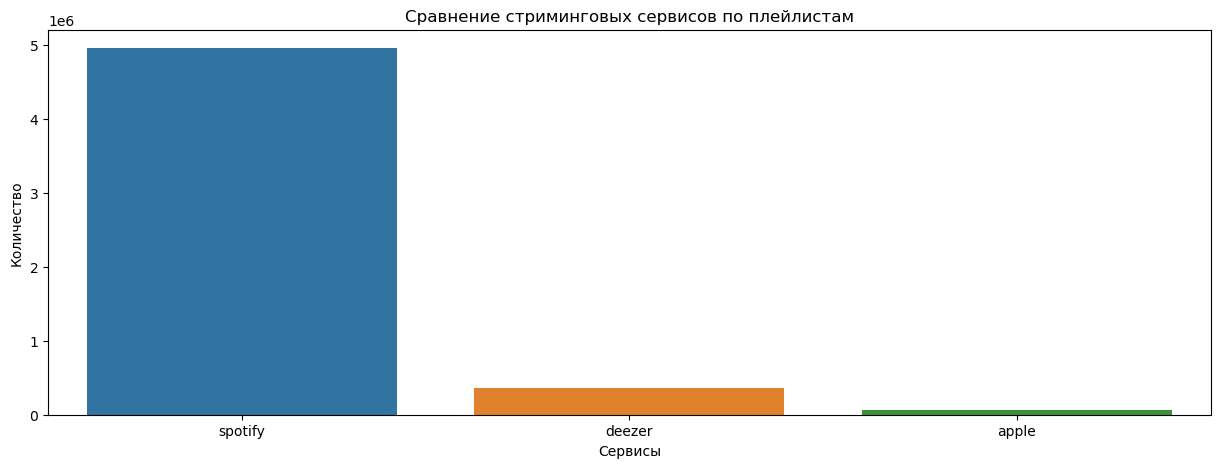

In [ ]:
sns.barplot(y=playlists.values, x=playlists.index)
plt.xticks(np.arange(3), ['spotify', 'deezer', 'apple'])
plt.title('Сравнение стриминговых сервисов по плейлистам')
plt.xlabel('Сервисы')
plt.ylabel('Количество')
plt.show()

In [ ]:
charts = df[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']].sum().sort_values(ascending=False)

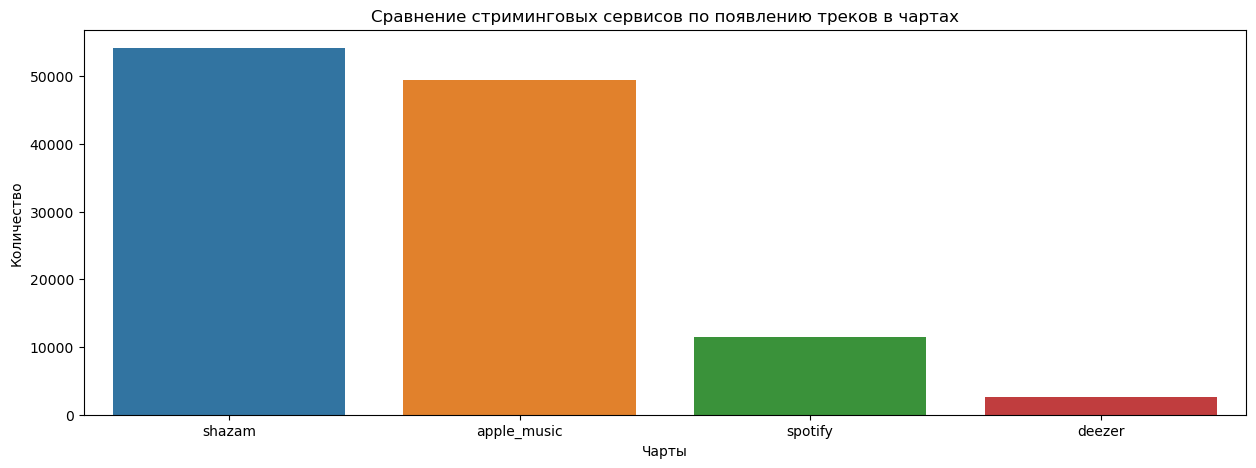

In [ ]:
sns.barplot(y=charts.values, x=charts.index)
plt.title('Сравнение стриминговых сервисов по появлению треков в чартах')
plt.xticks(np.arange(4), ['shazam', 'apple_music', 'spotify', 'deezer'])
plt.xlabel('Чарты')
plt.ylabel('Количество')
plt.show()

Как мы видим из двух графиков, подавляющее большинство треков находится в плейлистах именно на spotify, когда в чартах на shazam или apple_music. Эти три стриминговых сервиса и представляют наибольшую долю на рынке.

## 4 Вывод

- 1 Взяли DataFrame из открытого источника, проанализировали его на пригодность и репрезентативность, выгрузили из csv файла
- 2 Провели предобработку данных DataFrame:
  - 2.1 Убрали пропуски там, где это было бы критично.
  - 2.2 Изменили типы данных со str на float или int.
  - 2.3 Создали отдельный DataFrame, состоящий только из важной информации о конкретной композиции.
- 3 Провели исследовательский анализ данных:
  - 3.1 Рассмотрели общую статистику по количествам стримов. Подавляющее большинство находится в районе, где Log(x)стримов = 15, 23
  - 3.2 Нашли исполнителей с самым большим количеством треков(сольных и в общем). В тройку лидеров вошли - Тэйлор Свифт, Bad Bunny, The Weeknd
  - 3.3 Нашли самых популярных исполнителей. Проверили их с прошлым пунктом. В итоге самыми "Успешными" исполнителями оказались - The Weeknd, Taylor Swift, Ed Sheeran, Harry Styles, Bad Bunny. С ними выгодно продолжать сотрудничество.
  - 3.4 Оценили корелляцию между разными аспектами музыки и количеством стримов. По итогу оказалось, что нет четкой зависимости, и любые треки могут оказаться популярными.
  - 3.5 Выявили тенденцию к серьезному увеличению количества использований стриминговых сервисов в последнее время. Разница между 2021 годом и 2022 очень большая.
  - 3.6 Под конец выявили, в каких сервисах пользуются плейлистами(В данном контексте непревзойденный лидер - Spotify), а в каких препочитают чарты(Первое место практически "поделили" Apple Music и Shazam)
- 4 Выводы исследования:
  - 4.1 Смотря за тенденцией, создание или поддержка стримингового сервиса становистя все более актуальной. На данный момент не так много больших конкурентов на рынке, то есть площадка еще свежая.
  - 4.2 Что касается исполнителей, то заметно, что лишь на самом верху количество треков = популярность. Где известность автора сподвигает больше работать, что приносит больше известности. Но для остальных это не так.
  - 4.3 У пользователей нет предпочтений, или bias к какому-то определенному типу треков.

## 5 P.S. от автора

Возьмем самые популярные треки из выборки. Сколько из них Вы знаете?

In [ ]:
song_info.sort_values('streams', ascending=False).head(10)

,track_name,artist(s)_name,artist_count,streams,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,splitted
55,Blinding lights,The Weeknd,1,3703895074,171,C#,Major,50,38,80,0,0,9,7,[The Weeknd]
179,Shape of you,Ed Sheeran,1,3562543890,96,C#,Minor,83,93,65,58,0,9,8,[Ed Sheeran]
86,Someone you loved,Lewis Capaldi,1,2887241814,110,C#,Major,50,45,41,75,0,11,3,[Lewis Capaldi]
620,Dance monkey,Tones and I,1,2864791672,98,F#,Minor,82,54,59,69,0,18,10,[Tones and I]
41,Sunflower - spider-man: into the spider-verse,"Post Malone, Swae Lee",2,2808096550,90,D,Major,76,91,50,54,0,7,5,"[Post Malone, Swae Lee]"
162,One dance,"Drake, WizKid, Kyla",3,2713922350,104,C#,Major,77,36,63,1,0,36,5,"[Drake, WizKid, Kyla]"
84,Stay (with justin bieber),"Justin Bieber, The Kid Laroi",2,2665343922,170,C#,Major,59,48,76,4,0,10,5,"[Justin Bieber, The Kid Laroi]"
140,Believer,Imagine Dragons,1,2594040133,125,A#,Minor,77,74,78,4,0,23,11,[Imagine Dragons]
725,Closer,"The Chainsmokers, Halsey",2,2591224264,95,G#,Major,75,64,52,41,0,11,3,"[The Chainsmokers, Halsey]"
48,Starboy,"The Weeknd, Daft Punk",2,2565529693,186,G,Major,68,49,59,16,0,13,28,"[The Weeknd, Daft Punk]"


Ответ автора - 4